In [1]:
import numpy as np
import pandas as pd

from classification import process,compare_model,create_model,predict_model

In [2]:
df = pd.read_csv('Term_Deposit.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
1,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
3,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
4,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [3]:
X = df.drop(columns = ['y'])
y = df.y

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = process(X, y,
                                           test_size=0.10,
                                           poly=2,
                                           normalize_method='zscore',
                                           fix_imbalance=True
                                          )

In [4]:
compare_model(X_train, y_train,fold=5)

,Model,Accuracy,Recall,Prec,F1,TT (Sec)
lr,Logistic Regression,0.806038,0.837612,0.679357,0.709133,9.430914
dt,Decision Tree Classifier,0.913410,0.823107,0.747292,0.778182,11.195647
nb,Naive Bayes,0.741325,0.631237,0.673836,0.620025,0.649119
gbc,Gradient Boosting Classifier,0.913168,0.873317,0.747080,0.794650,235.035142
rf,Random Forest Classifier,0.944346,0.922985,0.792860,0.845950,70.873127
xgboost,Extreme Gradient Boosting,0.946493,0.820098,0.813263,0.816426,59.257195
lightgbm,Light Gradient Boosting Machine,0.944197,0.829682,0.807313,0.817813,6.932265


In [5]:
model = create_model(X_train, y_train,fold=10,md_name='lightgbm')

,Accuracy,Recall,Prec,F1
Fold,,,,
0,0.906478,0.644615,0.608128,0.625840
1,0.907411,0.661367,0.595136,0.626506
2,0.909074,0.617742,0.605055,0.611333
3,0.903286,0.596026,0.567823,0.581583
4,0.913555,0.609477,0.624791,0.617039
5,0.944548,0.930865,0.936294,0.933572
6,0.991225,0.991225,1.000000,0.995593
7,0.994212,0.994212,1.000000,0.997098
8,0.992718,0.992718,1.000000,0.996346


              precision    recall  f1-score   support

           0       0.94      0.95      0.95     13129
           1       0.62      0.57      0.59      1787

    accuracy                           0.91     14916
   macro avg       0.78      0.76      0.77     14916
weighted avg       0.90      0.91      0.90     14916



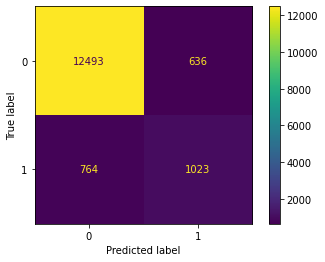

In [6]:
predict_model(X_test, y_test,model)